In [1]:
from pylab import *
%matplotlib inline


In [2]:
def RK4(ec,p_ini,x,args=[],h=0.01): #integrador Runge-Kutta de  4 orden el cual integra ecuaciones diferenciales
    if (x[1]-x[0]) < 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [9]:
def e_mov(r_v,t,gamma=[0],g=9.8,m=1): #ecuaciones de movimiento
    dx = r_v[2] #derivada de x
    dy = r_v[3] #derivada de y
    dvx = 0-gamma[0]*r_v[2] #derivada de vx utilizo segunda ley de newton
    dvy = -g-gamma[0]*r_v[3] #derivada de vy, utilizando segunda ley de Newton
    return array([dx,dy,dvx,dvy]) #me regresa array de las derivadas

def pared_arriba(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    y_izq=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    ymed = sol[-1,:]
    while abs(y_izq[1]-3-5*tan(alfa)) > 1e-8:
        #print y_izq[1]
        if (y_izq[1]-3-5*tan(alfa))*(ymed[1]-3-5*tan(alfa)) < 0:
            reinicio = y_izq
        else:
            reinicio = ymed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        y_izq = reinicio
        ymed = sol[-1,:] #es el ultimo punto que integro
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

def pared_abajo_1(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    pmed = sol[-1,:]
    vel_y=p_ant[3]
    while abs(p_ant[1]-(5-p_ant[0])*tan(alfa)) > 1e-8:
        if (p_ant[1]-(5-p_ant[0])*tan(alfa))*(pmed[1]-(5-pmed[0])*tan(alfa)) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    if (vel_y/p_ant[2])>tan(alfa):
        p_ant = array([p_ant[0],p_ant[1],p_ant[2],-p_ant[3]])
    else:
        p_ant = array([p_ant[0],p_ant[1],-p_ant[2],-p_ant[3]])
    return p_ant
            
def pared_abajo_2(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    pmed = sol[-1,:]
    vel_y=p_ant[3]
    while abs(p_ant[1]-(p_ant[0]-5)*tan(alfa)) > 1e-8:
        if (p_ant[1]-(p_ant[0]-5)*tan(alfa))*(pmed[1]-(pmed[0]-5)*tan(alfa)) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    if (vel_y/p_ant[2])>tan(alfa):
        p_ant = array([p_ant[0],p_ant[1],p_ant[2],-p_ant[3]])
    else:
        p_ant = array([p_ant[0],p_ant[1],-p_ant[2],-p_ant[3]])
    return p_ant

def pared_izq(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    pmed = sol[-1,:]
    while abs(p_ant[0]) > 1e-8:
        if (p_ant[0]*pmed[0]) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],-p_ant[2],p_ant[3]])
    return p_ant

def pared_der(r_v_i,mi_dt,alfa=0,gamma=[0]):
    dt_bus = mi_dt/2
    p_ant=r_v_i
    t,sol = RK4(e_mov,r_v_i,[0,dt_bus],gamma)
    pmed = sol[-1,:]
    while abs(p_ant[0]-10) > 1e-8:
        if (p_ant[0]-10)*(pmed[0]-10) < 0:
            reinicio = p_ant
        else:
            reinicio = pmed
        dt_bus = dt_bus/2
        t,sol=RK4(e_mov,reinicio,[0,dt_bus],gamma)
        p_ant = reinicio
        pmed = sol[-1,:] #es el ultimo punto que integro
    p_ant = array([p_ant[0],p_ant[1],-p_ant[2],p_ant[3]])
    return p_ant

In [16]:
#trayectoria=zeros((5000,4)) #trayectoria es un array de zeros cuya primer entrada es la cond inicial
def caja(alfa,dt,n,gamma=[0],i=0):
    trayectoria = [array([5./3,10*tan(alfa)/3.,10*cos(n*alfa),10*sin(n*alfa)])]
    while i<= 100: #para cada paso
        t,sol_dt=RK4(e_mov,trayectoria[-1],[0,dt],gamma) #realiza una integracion con estos parametros
        if (sol_dt[-1,:][1]-(5-sol_dt[-1,:][0])*tan(alfa) < 0) and sol_dt[-1,:][0]<5 : #si hay un cambio de signo en la integracion 
            punto=pared_abajo_1(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        elif (sol_dt[-1,:][1]+(5-sol_dt[-1,:][0])*tan(alfa) < 0) and sol_dt[-1,:][0]>5:
            punto=pared_abajo_2(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        elif (sol_dt[-1,:][1]-3-5*tan(alfa))>0: #si no es asi
            punto=pared_arriba(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        elif sol_dt[-1,:][0]<0: #si no es asi
            punto=pared_izq(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        elif (sol_dt[-1,:][0]-10)>0: #si no es asi
            punto=pared_der(trayectoria[-1],dt,alfa,gamma) #reboto y aplica la funcion rebote
            trayectoria.append(punto) #la trayectoria es el nuevo punto que da rebote
            i+=1
        else: #si no es asi
            trayectoria.append(sol_dt[-1,:]) #la trayectoria es el ultimo punto de la integracion
    x_y=zeros((len(trayectoria),4))
    for j in range(len(trayectoria)):
        x_y[j]=trayectoria[j]
    return x_y

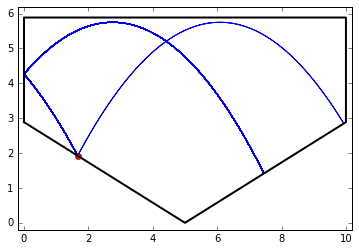

ZeroDivisionError: float division by zero

In [17]:
alfa=pi/6
x_y=caja(pi/6,0.01,2,[0])
plot(x_y[:,0],x_y[:,1])
plot(x_y[0,0],x_y[0,1],'ro')
plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
xlim([-.2,10.2])
ylim([-0.2,6.2])
show()
alfa=pi/6
x_yf=caja(pi/6,0.01,2,[0.2])
plot(x_yf[:,0],x_yf[:,1])
plot(x_yf[0,0],x_yf[0,1],'ro')
plot([0,5,10,10,0,0],[5*tan(alfa),0,5*tan(alfa),3+5*tan(alfa),3+5*tan(alfa),5*tan(alfa)],'k',lw=2)
xlim([-.2,10.2])
ylim([-.2,5*tan(alfa)+3.2])
show()

print x_y[-20:-1][:]